In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train = raw_train.copy()
data = [train,test]

Text(0.5,1,'Survived')

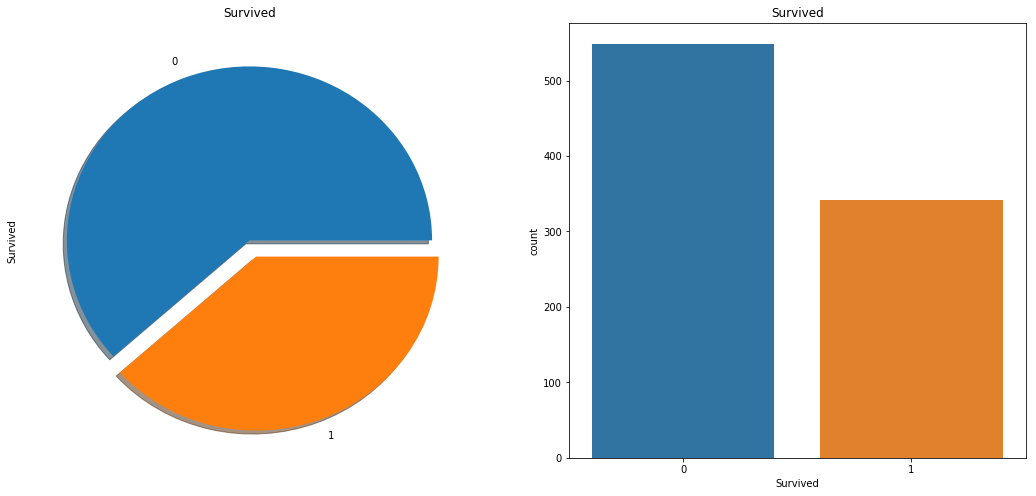

In [29]:
# 看目标分布情况
f,ax=plt.subplots(1,2,figsize=(18,8))
train["Survived"].value_counts().plot.pie(ax=ax[0],shadow=True,explode = [0,0.1])
ax[0].set_title("Survived")
sns.countplot("Survived",ax=ax[1],data=train)
ax[1].set_title("Survived")
# 死亡率很高

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
for item in data:
    
    print(item.columns.values)
    print(item.info())
    print(item.isnull().sum())
    print("**"*10)
    print("**"*10)
    

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
********************
['PassengerId' 'Pcla

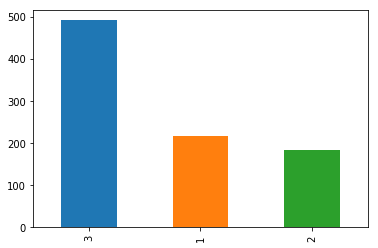

In [37]:
# 看特征
train["Pclass"].value_counts().plot.bar()
# 3类占多数

In [54]:
train[["Survived","Pclass"]].groupby("Pclass",as_index = False).mean()
# 级别为1 的成活率高，级别为3。。。

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


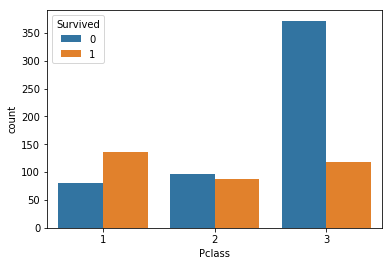

In [53]:
sns.countplot("Pclass",hue= "Survived",data=train)

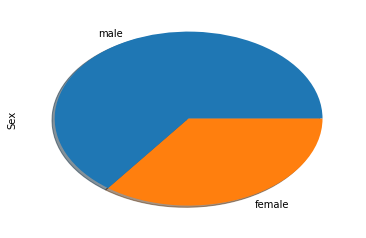

In [59]:
# 性别
train["Sex"].value_counts().plot.pie(shadow=True)
# 男性占大多数

In [73]:
train[["Survived","Sex"]].groupby("Sex",as_index=False).mean()
# 女性成活率高

,Sex,Survived
0,female,0.742038
1,male,0.188908


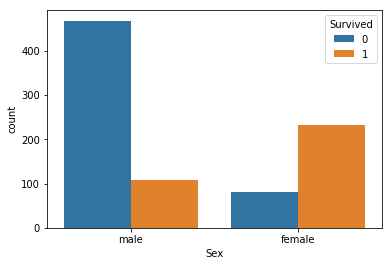

In [76]:
sns.countplot("Sex",hue="Survived",data=train)

In [78]:
# age
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

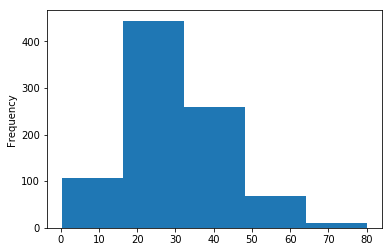

In [101]:
train["Age"].plot.hist(bins=5)
# 20岁到 40岁占多数

In [90]:
age_avg  = train['Age'].mean()
age_std  = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
age_null_random_list

array([20, 42, 17, 28, 30, 40, 24, 41, 41, 20, 23, 16, 22, 29, 20, 38, 33,
       17, 26, 24, 37, 41, 42, 20, 18, 20, 18, 35, 28, 31, 40, 15, 30, 34,
       24, 36, 39, 37, 26, 20, 26, 20, 43, 32, 26, 28, 28, 34, 22, 40, 33,
       38, 37, 43, 21, 35, 28, 33, 20, 41, 27, 38, 24, 17, 21, 42, 16, 29,
       26, 42, 26, 21, 20, 31, 24, 26, 20, 41, 19, 33, 23, 31, 33, 23, 31,
       20, 20, 35, 26, 18, 39, 36, 30, 32, 38, 17, 38, 26, 19, 23, 42, 33,
       34, 16, 26, 34, 43, 30, 25, 29, 17, 43, 39, 34, 39, 36, 34, 40, 38,
       43, 17, 19, 21, 27, 26, 41, 15, 34, 18, 35, 22, 16, 26, 40, 39, 32,
       36, 37, 34, 16, 28, 32, 28, 24, 23, 42, 31, 21, 23, 33, 43, 39, 37,
       27, 37, 18, 32, 35, 22, 21, 31, 21, 24, 28, 18, 39, 39, 35, 42, 27,
       41, 28, 22, 25, 38, 17, 43])

In [91]:
train["Age"][train["Age"].isnull()] = age_null_random_list

c:\users\caiwei\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
train["Age"].isnull().sum()

0

In [100]:
train["AgeC"]=pd.cut(train["Age"].astype(int),5)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [99]:
train = train.drop("CategoricalAge",axis=1)

In [113]:
train[["Survived","AgeC"]].groupby("AgeC",as_index=False).mean()
# 年龄大了 和年龄小的 存活率很高

,AgeC,Survived
0,"(-0.08, 16.0]",0.523364
1,"(16.0, 32.0]",0.356502
2,"(32.0, 48.0]",0.372093
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


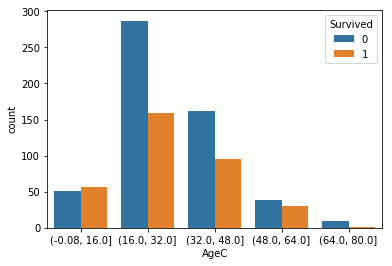

In [109]:
sns.countplot("AgeC",hue="Survived",data=train)
#年轻人 存活率低 

In [136]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [147]:
train[["FamilySize","Survived"]].groupby("FamilySize",as_index = False).mean().sort_values(by="Survived")

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


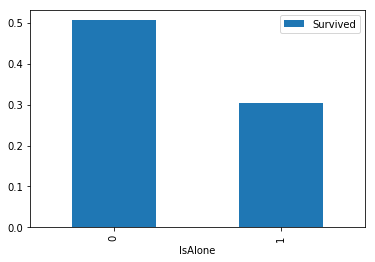

In [166]:
train["IsAlone"] = 0
train.loc[train["FamilySize"] == 1,"IsAlone"] = 1
train[["IsAlone","Survived"]].groupby("IsAlone").mean().plot.bar()
# 不是一个人存活率高一点

In [179]:
# 票价
train["FareC"] = pd.qcut(train["Fare"],4)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeC,FamilySize,IsAlone,FareC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",1,1,"(7.91, 14.454]"


In [183]:
train[["FareC","Survived"]].groupby("FareC").mean().sort_values(by="Survived")

,Survived
FareC,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [186]:
# Embarked
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [194]:
train[["Survived","Embarked"]].groupby("Embarked").mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


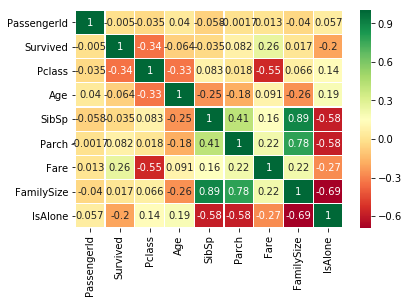

In [200]:
# 找特征之间关系
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

In [201]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeC,FamilySize,IsAlone,FareC
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]",2,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]",1,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]",1,1,"(7.91, 14.454]"


In [203]:
train = train.drop(["PassengerId","Name","Age","SibSp","Parch","Ticket","Cabin","Fare"],axis=1)


KeyError: "labels ['PassengerId' 'Name' 'Age' 'SibSp' 'Parch' 'Ticket' 'Cabin'] not contained in axis"

In [205]:
train = train.drop("Fare",axis=1)
train.head()

,Survived,Pclass,Sex,Embarked,AgeC,FamilySize,IsAlone,FareC
0,0,3,male,S,"(16.0, 32.0]",2,0,"(-0.001, 7.91]"
1,1,1,female,C,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
2,1,3,female,S,"(16.0, 32.0]",1,1,"(7.91, 14.454]"
3,1,1,female,S,"(32.0, 48.0]",2,0,"(31.0, 512.329]"
4,0,3,male,S,"(32.0, 48.0]",1,1,"(7.91, 14.454]"


In [207]:
test["FareC"] = pd.qcut(test["Fare"],4)

In [209]:
test["IsAlone"] = 0
test.loc[test["FamilySize"] == 1,"IsAlone"] = 1

In [212]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
FamilySize       0
FareC            1
IsAlone          0
dtype: int64